# Data Reading

In [1]:
import math
from operator import itemgetter
from pathlib import Path
import pandas as pd

In [5]:
all_txt_files =[]
for file in Path("txt").rglob("*.txt"):
     all_txt_files.append(file.parent / file.name)
# counts the length of the list
all_docs = []
for txt_file in all_txt_files:
    with open(txt_file) as f:
        txt_file_as_string = f.read()
    all_docs.append(txt_file_as_string)

# Data Cleaning

In [10]:
documents = []
for i in range(0, len(all_docs)):
    documents += all_docs[i].replace("\n",'').replace(',','').replace("?","").replace("(","").replace(")","").replace('.','').replace('–','').replace("'s",'').lower().split('\n ')
documents[-1] = documents[-1].replace('.','')

In [11]:
documents

['the once ruddy face was puffy and pale the brushed-back gray-brown hair was straight and thin--not the wiry dark curls of a few year ago he walked stiffly although his figure was trim and erect behind his glasses his dark brown eyes looked fixed and he seemed to be daydreaming at the age of 77 the legendary g-man--in his 48th year as director of the federal bureau of investigation--the most enduring and perhaps if there is such a thing as a cumulative total the most powerful official in the long span of the american government--looked deceptively like any other old gentlemen in the hotel lobby in one of his rare reflections on mortality a few years ago mr hoover told a reporter "the greatest enemy is time" time advances against this seemingly indestructible official had become obvious but then mr hoover was always more human than he or the myth admitted mr hoover power was a compound of performance and politics publicity and personality at the base of it all however was an extraordin

In [14]:
from textblob import Word
documents = [" ".join([Word(word).lemmatize() for word in sentence.split(" ")]) for sentence in documents]

In [16]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
documents1 = [" ".join([st.stem(word) for word in sentence.split(" ")]) for sentence in documents]

a = documents1[0].split(' ')
b = documents[0].split(' ')
c = []
for i in range(len(a)):
    c.append(str(b[i]) + ' -> ' + a[i])

c

In [272]:
dictOfWords = {}

for index, sentence in enumerate(documents):
    tokenizedWords = sentence.split(' ')
    dictOfWords[index] = [(word, tokenizedWords.count(word)) for word in tokenizedWords]


# Finding TF

In [273]:
termFrequency = {}

for i in range(len(documents)):
    listOfNoDuplicates = []
    for wordFreq in dictOfWords[i]:
        if wordFreq not in listOfNoDuplicates:
            listOfNoDuplicates.append(wordFreq)
        termFrequency[i] = listOfNoDuplicates

In [274]:
normalizedTermFrequency = {}
for i in range(len(documents)):
    sentence = dictOfWords[i]
    lenOfSentence = len(sentence)
    listOfNormalized = []
    for wordFreq in termFrequency[i]:
        normalizedFreq = wordFreq[1]/lenOfSentence
        listOfNormalized.append([wordFreq[0],normalizedFreq])
    normalizedTermFrequency[i] = listOfNormalized

# Finding IDF

In [275]:
allDocuments = ''
for sentence in documents:
    allDocuments += sentence + ' '
allDocumentsTokenized = allDocuments.split(' ')

allDocumentsNoDuplicates = []

for word in allDocumentsTokenized:
    if  word not in allDocumentsNoDuplicates:
        allDocumentsNoDuplicates.append(word)

In [276]:
dictOfNumberOfDocumentsWithTermInside = {}

for index, vocabulary in enumerate(allDocumentsNoDuplicates):
    count = 0
    for sentence in documents:
        if vocabulary in sentence:
            count += 1
    dictOfNumberOfDocumentsWithTermInside[index] = (vocabulary, count)

In [277]:
dictOFIDFNoDuplicates = {}

for i in range(len(normalizedTermFrequency)):
    listOFIDFCalcs = []
    for word in normalizedTermFrequency[i]:
        for x in range(len(dictOfNumberOfDocumentsWithTermInside)):
            if word[0] == dictOfNumberOfDocumentsWithTermInside[x][0]:
                listOFIDFCalcs.append((word[0], math.log((len(documents)/dictOfNumberOfDocumentsWithTermInside[x][1]))))
    dictOFIDFNoDuplicates[i] = listOFIDFCalcs

In [278]:
len(normalizedTermFrequency[0])


1601

In [279]:
len(dictOFIDFNoDuplicates[0])

1601

# Calculating TF-IDF

In [280]:
dictOFTF_IDF = {}
for i in range(len(normalizedTermFrequency)):
    listOFTF_IDF = []
    TFsentence = normalizedTermFrequency[i]
    IDFsentence = dictOFIDFNoDuplicates[i]
    for x in range(len(TFsentence)):
        listOFTF_IDF.append([TFsentence[x][0], TFsentence[x][1]*IDFsentence[x][1]])
    dictOFTF_IDF[i] = listOFTF_IDF


# Function for outputing data

In [281]:
import copy
def find_keywords(dictOFTF_IDF, key_word_number, reverse, value_name):
    example_dict = copy.deepcopy(dictOFTF_IDF)
    key_words = {}
    for n in range(len(example_dict)):
        if(reverse):
            example_dict[n].sort(key=itemgetter(1), reverse=True)
        else:
            example_dict[n].sort(key=itemgetter(1), reverse=False)
        docs = []
        for k in range(key_word_number):
            docs.append(example_dict[n][k])
        key_words[n] = docs
        
    
    df = pd.DataFrame(columns = ['number of doc', 'word', value_name])
    iter = 0
    for i in range(len(key_words)):
        for j in range(len(key_words[i])):
            df.loc[iter] = [i, key_words[i][j][0], key_words[i][j][1]]
            iter += 1
    return df

# Choose the keyword count which will outputing

In [282]:
keyword_count = 10

# Results

In [283]:
find_keywords(normalizedTermFrequency, keyword_count, True, 'tf_value')

,number of doc,word,tf_value
0,0,the,0.067565
1,0,a,0.035150
2,0,of,0.029888
3,0,and,0.025047
4,0,in,0.024626
...,...,...,...
995,99,he,0.026725
996,99,to,0.026450
997,99,in,0.025761
998,99,wa,0.020940


In [284]:
find_keywords(dictOFIDFNoDuplicates, keyword_count, True, 'idf_value')

,number of doc,word,idf_value
0,0,ruddi,4.60517
1,0,puffi,4.60517
2,0,brushed-back,4.60517
3,0,gray-brown,4.60517
4,0,thin--not,4.60517
...,...,...,...
995,99,10:30,4.60517
996,99,woodlawn,4.60517
997,99,eleventh,4.60517
998,99,liveliest,4.60517


In [285]:
find_keywords(dictOFTF_IDF, keyword_count, True, 'tfidf_value')

,number of doc,word,tfidf_value
0,0,hoover,0.058625
1,0,fbi,0.031987
2,0,bureau,0.009569
3,0,tolson,0.008724
4,0,director,0.005996
...,...,...,...
995,99,journalist,0.004312
996,99,charleston,0.004311
997,99,paper,0.003581
998,99,editori,0.003489


# All document Analisis

In [289]:
visualization = pd.DataFrame({'Text': documents})

In [290]:
visualization['Word_count'] = visualization['Text'].apply(lambda x: len(str(x).split(" ")))
visualization[['Text','Word_count']]

,Text,Word_count
0,the onc ruddi face wa puffi and pale the brush...,4751
1,he die of heart and kidney failur said hi brot...,1829
2,the republican leader stood by hi seat in the ...,3511
3,the 75-year-old dramatist had been ill sinc ju...,1236
4,presid kennedi led the nation republican and d...,4146
...,...,...
95,philadelphia jan 18--dr clarenc erwin mcclung ...,685
96,billi holiday fame jazz singer die yesterday i...,866
97,oslo oct 12 ap--sonja heni ice-sk queen and fi...,813
98,boston aug 22--dr gregori goodwin pincu one of...,1368


In [291]:
visualization['Char_count'] = visualization['Text'].str.len() ## this also includes spaces
visualization[['Text','Char_count']]

,Text,Char_count
0,the onc ruddi face wa puffi and pale the brush...,25140
1,he die of heart and kidney failur said hi brot...,9367
2,the republican leader stood by hi seat in the ...,18287
3,the 75-year-old dramatist had been ill sinc ju...,6461
4,presid kennedi led the nation republican and d...,22110
...,...,...
95,philadelphia jan 18--dr clarenc erwin mcclung ...,3675
96,billi holiday fame jazz singer die yesterday i...,4451
97,oslo oct 12 ap--sonja heni ice-sk queen and fi...,4208
98,boston aug 22--dr gregori goodwin pincu one of...,7365


In [292]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

visualization['Avg_word'] = visualization['Text'].apply(lambda x: avg_word(x))
visualization[['Text','Avg_word']]

,Text,Avg_word
0,the onc ruddi face wa puffi and pale the brush...,4.293535
1,he die of heart and kidney failur said hi brot...,4.121925
2,the republican leader stood by hi seat in the ...,4.217180
3,the 75-year-old dramatist had been ill sinc ju...,4.228155
4,presid kennedi led the nation republican and d...,4.334138
...,...,...
95,philadelphia jan 18--dr clarenc erwin mcclung ...,4.366423
96,billi holiday fame jazz singer die yesterday i...,4.140878
97,oslo oct 12 ap--sonja heni ice-sk queen and fi...,4.177122
98,boston aug 22--dr gregori goodwin pincu one of...,4.384503


In [293]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

visualization['Stopwords'] = visualization['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
visualization[['Text','Stopwords']]

,Text,Stopwords
0,the onc ruddi face wa puffi and pale the brush...,1777
1,he die of heart and kidney failur said hi brot...,716
2,the republican leader stood by hi seat in the ...,1426
3,the 75-year-old dramatist had been ill sinc ju...,549
4,presid kennedi led the nation republican and d...,1570
...,...,...
95,philadelphia jan 18--dr clarenc erwin mcclung ...,268
96,billi holiday fame jazz singer die yesterday i...,358
97,oslo oct 12 ap--sonja heni ice-sk queen and fi...,338
98,boston aug 22--dr gregori goodwin pincu one of...,536


In [294]:
visualization['Numerics'] = visualization['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
visualization[['Text','Numerics']]

,Text,Numerics
0,the onc ruddi face wa puffi and pale the brush...,43
1,he die of heart and kidney failur said hi brot...,67
2,the republican leader stood by hi seat in the ...,84
3,the 75-year-old dramatist had been ill sinc ju...,11
4,presid kennedi led the nation republican and d...,51
...,...,...
95,philadelphia jan 18--dr clarenc erwin mcclung ...,35
96,billi holiday fame jazz singer die yesterday i...,12
97,oslo oct 12 ap--sonja heni ice-sk queen and fi...,25
98,boston aug 22--dr gregori goodwin pincu one of...,30


In [295]:
visualization

,Text,Word_count,Char_count,Avg_word,Stopwords,Numerics
0,the onc ruddi face wa puffi and pale the brush...,4751,25140,4.293535,1777,43
1,he die of heart and kidney failur said hi brot...,1829,9367,4.121925,716,67
2,the republican leader stood by hi seat in the ...,3511,18287,4.217180,1426,84
3,the 75-year-old dramatist had been ill sinc ju...,1236,6461,4.228155,549,11
4,presid kennedi led the nation republican and d...,4146,22110,4.334138,1570,51
...,...,...,...,...,...,...
95,philadelphia jan 18--dr clarenc erwin mcclung ...,685,3675,4.366423,268,35
96,billi holiday fame jazz singer die yesterday i...,866,4451,4.140878,358,12
97,oslo oct 12 ap--sonja heni ice-sk queen and fi...,813,4208,4.177122,338,25
98,boston aug 22--dr gregori goodwin pincu one of...,1368,7365,4.384503,536,30


In [296]:
alldoc = [(word, allDocumentsTokenized.count(word)) for word in allDocumentsTokenized]

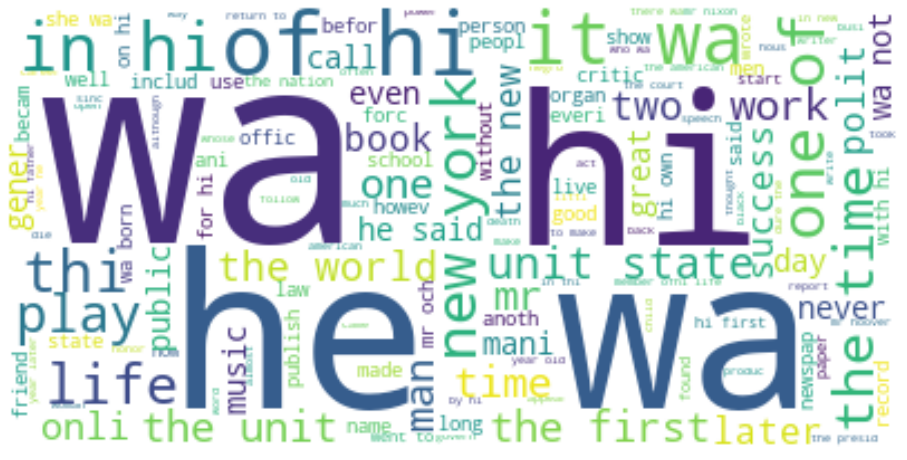

In [297]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (16, 12)
mpl.rcParams['axes.grid'] = False

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(allDocuments)

# Display the generated image:
wordcloud = WordCloud(max_words=2000, background_color="white").generate(allDocuments)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("first_review.png")

[Text(0, 0, 'the'),
 Text(0, 0, 'of'),
 Text(0, 0, 'and'),
 Text(0, 0, 'in'),
 Text(0, 0, 'to'),
 Text(0, 0, 'he'),
 Text(0, 0, 'wa'),
 Text(0, 0, 'hi'),
 Text(0, 0, 'that'),
 Text(0, 0, 'for'),
 Text(0, 0, 'it'),
 Text(0, 0, 'mr'),
 Text(0, 0, 'on'),
 Text(0, 0, 'with'),
 Text(0, 0, 'had'),
 Text(0, 0, 'at'),
 Text(0, 0, 'by'),
 Text(0, 0, 'from'),
 Text(0, 0, 'year'),
 Text(0, 0, 'but')]

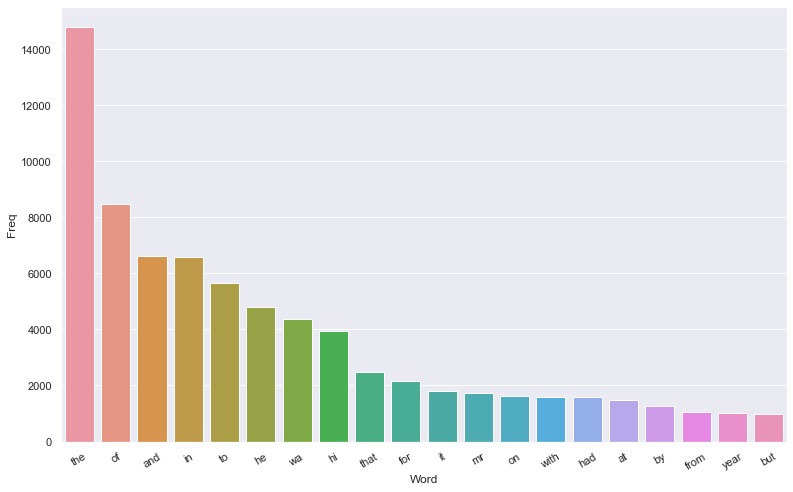

In [298]:
from sklearn.feature_extraction.text import CountVectorizer
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(allDocumentsTokenized, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)